In [ ]:
import sys
sys.path.append("../src") 
sys.path.append("../data") 
import SDE_class as sde

import importlib #リロード呼ぶ関数
importlib.reload(sde) #リロード

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import util as util
importlib.reload(util)

import math
from scipy.stats import norm

import sys
sys.path.append("../src") 
sys.path.append("../data") 


import SDE_class as sde
import importlib
importlib.reload(sde)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import util as util
importlib.reload(util)

# 独立増分の確認

$$X_t-X_s \amalg X_s$$
$$X_t-X_s \sim N(0,t-s)$$

In [ ]:
term=1#最終時刻
step=0.1#刻み幅
div=term/step#飛ぶ回数
init=np.array([0.])#初期値
repeat_time=20000#pass本数
S=0

In [ ]:
mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

In [ ]:
#t,x = mymodel.many_step_2()

In [ ]:
a=mymodel.many_step()
print(a)

In [ ]:
brown_motion=np.zeros([repeat_time,div+1])
for k in range(repeat_time):
    many_step = mymodel.many_step(now_position=init)
    brown_motion[k,:]=many_step
print(brown_motion)

In [25]:
var_s=np.var(brown_motion[:,time_s*div])
mean_s=np.mean(brown_motion[:,time_s*div])
print(var_s)
print(mean_s)

0.29856285973
0.0108951134097


/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [26]:
var_ts=np.var(brown_motion[:,time_t*div]-brown_motion[:,time_s*div])
mean_ts=np.mean(brown_motion[:,time_t*div]-brown_motion[:,time_s*div])
print(var_ts)
print(mean_ts)

0.302723435352
0.00127652639549


/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


# brown motion を確認するための正規分布 であるかの検定
アンダーソン　ダーリング検定を用いる

方法
統計量 $A^2=-n-S $

nは標本数、$X_{(i)}$は標本を小さい順に並び替えたもの

$$S=\sum_{i=1}^n \frac{2i-1}{n}\bigl\{\log(F(X_{(i)}))+\log(1-F(X_{(n+1-i)}))\bigr\}$$

この統計量とCV値で比較して検定を行う。

有意水準　CV値

$15\% \cdots 1.610$

$10\% \cdots 1.933$

$5\% \cdots 2.492$

$2.5\% \cdots 3.070$

$1.0\% \cdots 3.857$

まずは確率変数を正規化したあと、

$S$を計算するために確率変数を小さい順にソートする。

今$n$は標本数なので$n=$repeat time

In [10]:
brown_motion_time_s=brown_motion[:,time_s*div]
brown_motion_time_s.sort()
brown_motion_time_s.reshape(1,repeat_time)
#plt.hist(time_ts_box,50)
#standard_normal=time_ts_box.reshape(1,repeat_time)/np.sqrt(time_t-time_s)

/Users/tamamoon/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([[-2.14766443, -2.12944988, -2.11310606, ...,  1.93504996,
         2.09304574,  2.23761791]])

In [11]:
cdf_box=np.zeros(repeat_time)
for k in range(repeat_time):
    cdf_box[k]=norm.cdf(brown_motion_time_s[k],0,np.sqrt(time_s))

In [12]:
static_box=np.zeros(repeat_time)
for k in range (repeat_time):
    static_box[k]=(2*(k+1)-1)/repeat_time*(np.log(cdf_box[k])+np.log(1-cdf_box[repeat_time-1-k]))

In [13]:
A=-repeat_time-sum(static_box)
A

1.3396715952076192

In [14]:
np.mean(static_box)

-1.0000669835797606

In [15]:
np.var(static_box)

0.18157789064541593

In [16]:
np.var(static_box,ddof=1)

0.18158696999391563

# グラフの確認

#
term: 満期時刻　step:一度に進む幅　init:初期値

In [17]:
#mymodel = sde.SDE_Markov(mymat=np.array([[0.]]), myvar =np.array([[1.]]),myinit=np.array([1.]),myscale=1.,myterm=term,step_size=step)

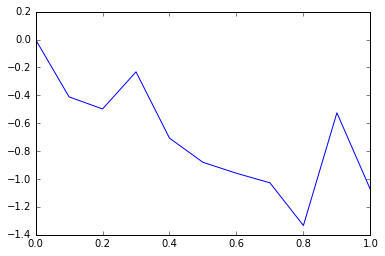

In [18]:
util.simulate("brown_motion",term,step,init)